# B455 Project 3
By Owen Gordon <br><br>
For this project I am using the CIFAR10 dataset to classify images. The dataset consists of 50,000 32x32 pixel images that fall into one of ten categories. The categories are: airplane, automoblie, bird, cat, deer, dog, frog, horse, ship, and truck.<br><br>

The main purpose of this project is to learn how to implement a Deep Neural Network (DNN). To implement the DNN I chose to use the Keras package within Tensorflow. This is a high level machine learning library that abstracts away the mathematics almost entirely, and allows intuitive access to building network structures.<br><br>

Loading the dataset for this project was extremely simple because this is one of the sample datasets that you can load directly from the Keras package.<br><br>

One small note for this project. Make sure that this notebook is using hardware acceleration, and using a GPU. This will ensure that the models train in a reasonable amount of time. Otherwise, some of these could take a while...


In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

cifar10 = keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

After importing the data, the next step is to decide how long learning should last, and also create a way to analyze the results of training a model.<br><br>
I settled on 10 epochs for the learning time for each model. This will be used for each model to compare how well each model performs. To test how sucessful the learning was, I am going to look at the accuracy and the loss for each model. I will plot the recorded loss values of of the training data vs the testing data at each each epoch, and also plot the recorded accuracies of the training data vs the testing data at each epoch. This will give a good picture of how successful the learning was, and if overfitting was occuring.

In [2]:
import matplotlib.pyplot as plt

epochs = 10

def plot_learning(results, epochs):
  acc = results.history['accuracy']
  val_acc = results.history['val_accuracy']

  loss = results.history['loss']
  val_loss = results.history['val_loss']

  epochs_range = range(epochs)

  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy (% correct)')
  plt.show()

  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show()

**Model 1**

Now that models can be analyzed, the baseline model can be created. For my baseline, I created a model with 5 hidden layers and 128 nodes in each layer.<br><br>

Before the model executes there is a preprocessing layer that scales the input values. Each input is a value from 0 to 255 corresponding to a color, but computers don't care about colors, they care about numbers, so this should be rescaled. I used the Keras built in "rescaling" layer, which adjusts each input. There were two options for rescaling. The first option is to divide the input by 255, and this would map each value between 0 and 1. The other option was to divide each input by 127.5 and then subtract 1, to map each input from -1 to 1. I chose the second option, but it shouldn't have a large effect either way. The more important part was to rescale the values to numbers the computer could work with more easily. I did this preprocessing for each model. <br><br>

After preprocessing, the next layer was a flattening layer, which flattens the pixel matrix into a single input vector. This was necessary so that the inputs could be properly fed into the first hidden layer. Like I said earlier, this network contains 5 hidden layers with 128 nodes in each layer. I used the ReLu activation funcion for each node in the hidden layers. The final layer of this network was the layer which will ultimalty classify the input. For this layer I used a standard layer with 10 nodes, to correspond with the 10 categories, and then a softmax activation fuction which will select the class that the input belongs to.<br><br>

There are only a couple more parts left before the model is ready to begin learning. The next thing to do is pick the model optimizer. I chose stochastic gradient descent for the optimizer for this baseline model because it is similar to the type that we used in the earlier projects. <br><br>

The final decision for the model was to pick the loss function. In project 1, we used sum squared error as our loss fuction. This loss was easy to calculate, and maybe more importantly, easy to calculate the partial derivative of. For this project, I chose to use a cross entrepy loss function, which is the same loss function as project 2.<br><br>

Every piece of the model is now constructed, so it is ready to be tested. And then once the model has completed learning, the results can be plotted and the success can be deteremined.

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0185 - accuracy: 0.2638 - val_loss: 1.6296 - val_accuracy: 0.4237
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6033 - accuracy: 0.4290 - val_loss: 1.5309 - val_accuracy: 0.4599
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4673 - accuracy: 0.4810 - val_loss: 1.4933 - val_accuracy: 0.4675
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3870 - accuracy: 0.5065 - val_loss: 1.4341 - val_accuracy: 0.4932
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3087 - accuracy: 0.5365 - val_loss: 1.3960 - val_accuracy: 0.5030
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2576 - accuracy: 0.5537 - val_loss: 1.3885 - val_accuracy: 0.5134
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2120 - accuracy: 0.5707 - val_loss: 1.3615 - val_accuracy:

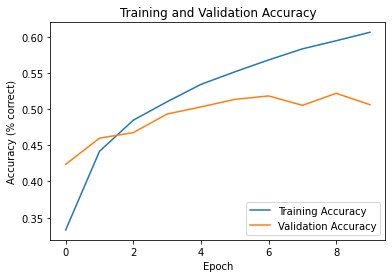

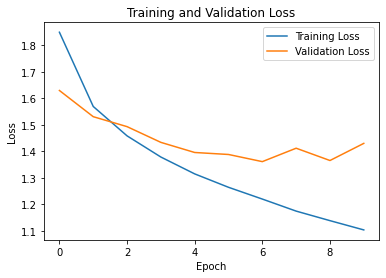

In [3]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(scale=1./127.5, offset=-1, input_shape=(32, 32, 3)),
  layers.Flatten(input_shape=(32, 32, 3)),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              steps_per_execution=1)

model_1_results = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)
plot_learning(model_1_results, epochs)

The results of the baseline model are not extremely impressive. Using the validation accuracy, the model's final accuracy is around 50%, but given that there where ten possible classes, this might actually be fairly impressive. 50% accuracy means that about half the time the selected class is right, but if you took a random sample, with 10 possiblity categories, one would expect that the accuracy would be 10%. Another thing to consider is that the input is images, and a standard neural network has no concept of what an image is, it was looking strictly at the color value of each pixel, and using that to turn neurons on and off. Even without looking at the pictures or learning features in the images the model managed to pick out patterns. All of these possible improvements can be made with the next two models.<br><br>

Looking at the output plots, it looks like this model might have not even fully converged yet, but the improvement to the validation data has hit a plateau. The accuracy and loss for the validation data didn't seem to improve after about the 4th epoch, but it doesn't look like the model was overfitting either. It just stopped learning. This is another issue that an be addressed in the next models.


**Model 2**

For my first fine tuned model I am going to use strictly convolutional layers to make a convolutional neural network (CNN). With a CNN, the fact that the inputs are images is exploited by the network, and each layer creates new images to learn features of the images. Like the baseline model, I used the relu activation function for each convolutional layer. After each convolutional layer there is a pooling layer which takes all of the new images generated, and pools the features into a new image which is then passed to the next convolution layer. This process is repeated 5 times, with each convoltional layer having double the filters of the previous. The the final layer is is the dense layer of neurons to classify the input. This model should perform better because images are being used, not just the flattened matricies. <br><br>

Just like the last model, I performed the same preprocessing on each input vector. This again turns the color values into numbers that a computer can work with more easily.<br><br>

Like before, the optimizer and the loss function have to be selected, and like with the baseline, I chose to use stochastic gradient descent for the optimizer, and categorical cross entropy for the loss function. <br><br>

Now that each part of the model has been selected, the model is ready to learn. The same plots will be generated afterwards to analyze the success of this model.

Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 2.1299 - accuracy: 0.2086 - val_loss: 1.6609 - val_accuracy: 0.3913
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6021 - accuracy: 0.4214 - val_loss: 1.4485 - val_accuracy: 0.4689
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3970 - accuracy: 0.5028 - val_loss: 1.3321 - val_accuracy: 0.5245
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2647 - accuracy: 0.5560 - val_loss: 1.2071 - val_accuracy: 0.5699
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1502 - accuracy: 0.5919 - val_loss: 1.1198 - val_accuracy: 0.6008
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0567 - accuracy: 0.6274 - val_loss: 1.0734 - val_accuracy: 0.6232
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9673 - accuracy: 0.6612 - val_loss: 1.0929 - val_accuracy:

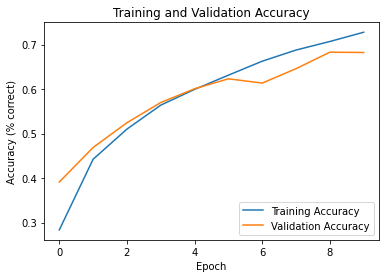

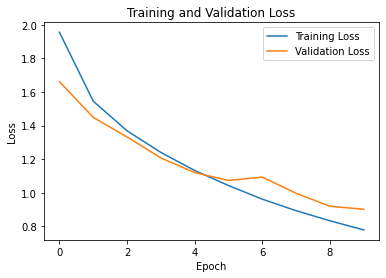

In [4]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(scale=1./127.5, offset=-1, input_shape=(32, 32, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              steps_per_execution=1)

model_2_results = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)
plot_learning(model_2_results, epochs)

The final accuracy of this model was 67%, which is a 17% improvement over the baseline. This also means that more often than not, this model is selecting the correct output. Actually two thirds of the time the model is correct, which is impressive when classifiying pictures of objects. <br><br>

The other interesting result is that, when looking at the plots, the validation value and training value are much closer than in the baseline model. This makes be believe that if training were to continue after 10 epochs, the accuracy could continue to improve. The loss plot shows no evidence of overfitting, and there is no plateau of the validation results in either plot. I think that if learning were to continue, this model would converge towards a higher accuracy.

**Model 3**

My second fine-tuned model is going to be a model with aspects of both a standard neural network and a convolutional neural network. The structure is going to begin like the a convolutional neural network with 4 iterations of convolutional layers and pooling layers. I decided to use convolutional layers because image classifcation should use features of the images. Just like before, the activation function for each convolutoinal layer is relu. I also have one Up Sampling layer in the convolutional part of my network. This exapnds the current layer which can magnify features in the images selected by convolutional layer. After the convolutoinal part of the network, I have one layer which is a standard hidden layer with 128 neurons and a relu activation function. This is the final layer before the output layer, and it is one more chance for the model to find any patterns in the convolutional output. The same preprocessing was applied to this model as the previous two.<br><br>

The final two decisions are the optimizer and loss functions. For the loss I used categorial cross entropy again, but this time I used a different optimizer. I used the nadam optimizer, which uses a concept of momentum to increase learning when the network is learning more and more.<br><br>

Now that every hyper-parementer is set, the model can start learning and be analyzed.

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5562 - accuracy: 0.4391 - val_loss: 1.0663 - val_accuracy: 0.6274
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8602 - accuracy: 0.7006 - val_loss: 0.8068 - val_accuracy: 0.7199
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6485 - accuracy: 0.7758 - val_loss: 0.7730 - val_accuracy: 0.7341
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5076 - accuracy: 0.8242 - val_loss: 0.7081 - val_accuracy: 0.7579
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3858 - accuracy: 0.8654 - val_loss: 0.7688 - val_accuracy: 0.7553
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2947 - accuracy: 0.8975 - val_loss: 0.8592 - val_accuracy: 0.7502
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2173 - accuracy: 0.9249 - val_loss: 0.9256 - val_accuracy

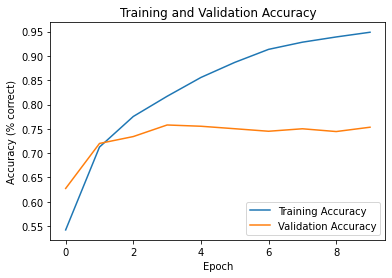

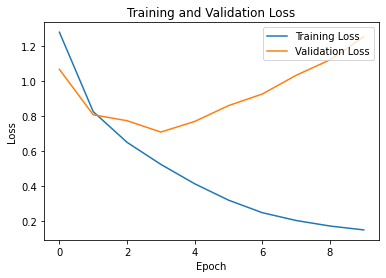

In [5]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(scale=1./127.5, offset=-1, input_shape=(32, 32, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.UpSampling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation='softmax')
])

model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              steps_per_execution=1)

model_3_results = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)
plot_learning(model_3_results, epochs)

The accuracy of this model is about 75%, the highest yet, but there are a few caveats. Firstly, the validation accuracy of this model hit a plateau around epoch 5, and the validation loss shows clear overfitting. I think the overfitting is due to this model being much more complicated than the previous two models. Dropout might be a way to optimize this model further, to reduce the number of connections between layers in the hopes of making the seperator function less specific and more generalizable. <br><br>

Even with the plateau and overfitting, this model has a great accuracy. Being able to predict the correct output three quarters of the time is a good achievement for a rudimentary DNN.

# Conclusion

Over the course of this project the accuracy went from 50% to 75%, which is a a 50% improvement. These accuracies aren't high enough to radically change how image recognition is done, but it shows there are still opportunities to improve the network structure to reach even higher accuracy rates.<br><br>

Some ideas for even futher optimazation is introducting weight dropout, continuing to fine tuning the number of neurons in the dense hidden layers, or optimizing number of filters in the convolution layers. Introducing dropout might reduce some of the overfitting. Changing the neurons in the dense layer could also reduce the complexity of the structure leading to less overfitting. Lastly, there are so many different types of convolutional layers in the Keras library. Many more types of convolutional layers could be used, and different types of pooling layers could also be used. Both of these could find more features in the images, and be able to recogize more patterns.<br><br>

Some other improvements could come from using different preprocessing, optimizers, loss functions, or number of training epochs. Each of these hyper-paramenters controls a piece of the network, and could improve the accuracy, or learning. <br><br>

Finally, the last improvment that might improve the network is expanding the DNN to be many many more layers deep. This wasn't pratical for this project becasue I don't have the computing power or time to repeatedly test a much deeper network, but this could reduce the feature engineering required, and allow the network to find patterns itself.